In [2]:
import pandas as pd 
import matplotlib.pyplot as pt
import numpy as np
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm
%matplotlib inline

In [3]:
dataset = pd.read_csv('C:/Users/Bradley/Documents/Spyder/ISL-linear-regression-master/data/Advertising.csv')

In [4]:
dataset.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
dataset.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
dataset.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [71]:
dataset.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [8]:
dataset.shape

(200, 5)

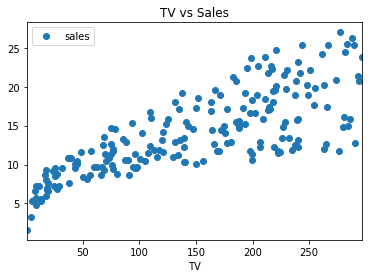

<Figure size 1440x1440 with 0 Axes>

In [9]:
dataset.plot(x='TV', y='sales', style='o')
pt.title('TV vs Sales')
pt.xlabel='TV'
pt.ylabel='Sales'
pt.figure(figsize=(20, 20))
pt.show()

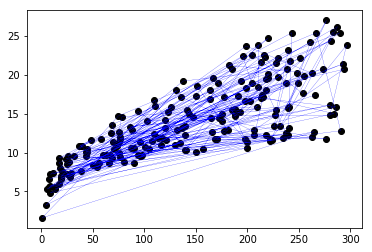

In [10]:
pt.scatter(dataset['TV'], dataset['sales'], color='black')
pt.plot(dataset['TV'], dataset['sales'], color='blue', linewidth=0.2)
pt.show()

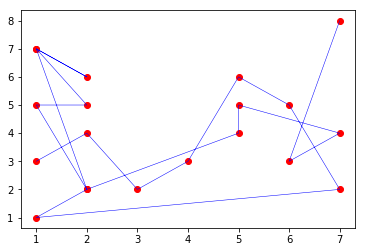

In [11]:
a = [1,2,3,4,5,6,7,1,2,1,2,1,2,1,2,5,5,7,6,7]
b = [3,4,2,3,6,5,2,1,2,5,5,7,6,7,2,4,5,4,3,8]
pt.scatter(a, b, color='red')
pt.plot(a, b, color='blue', linewidth=0.5)
pt.show()

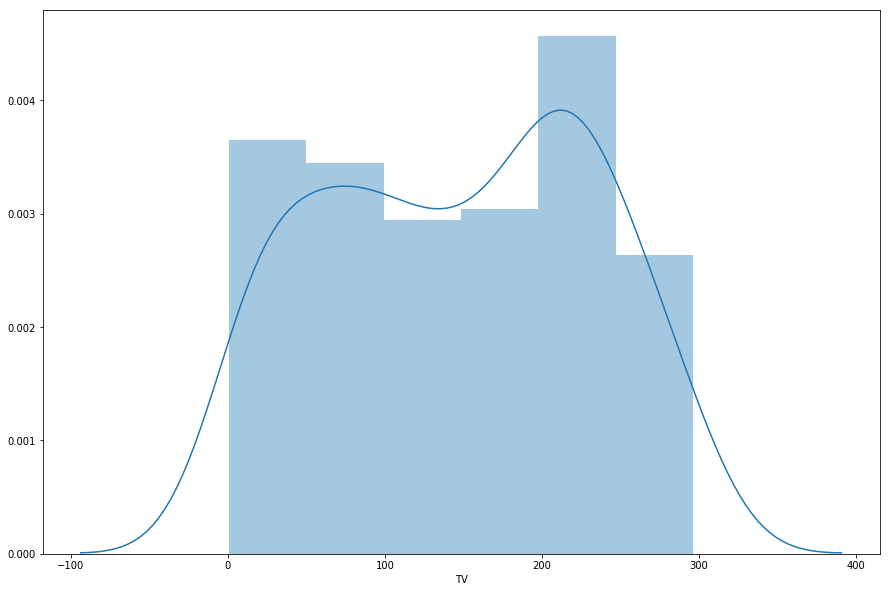

In [12]:
pt.figure(figsize=(15, 10))
pt.tight_layout()
seabornInstance.distplot(dataset['TV'])

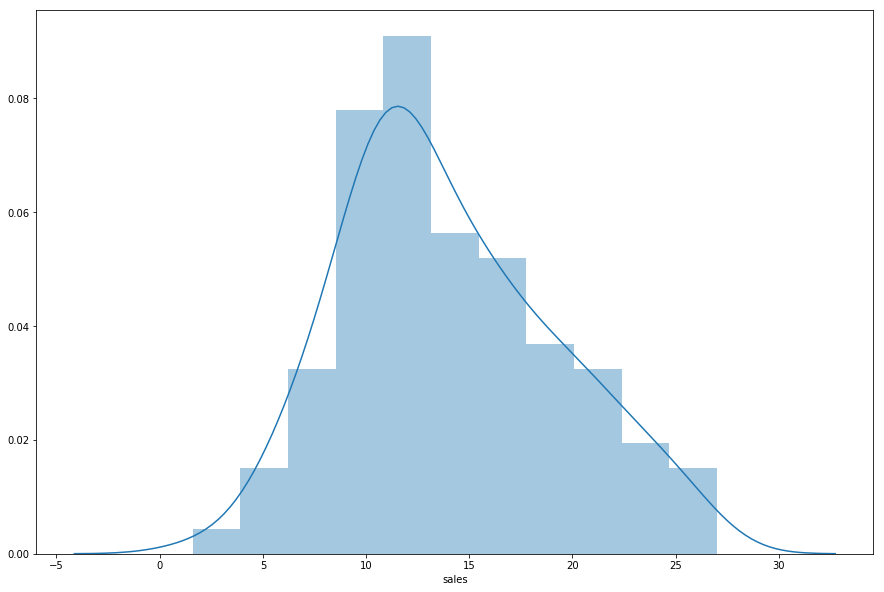

In [13]:
pt.figure(figsize=(15, 10))
pt.tight_layout()
seabornInstance.distplot(dataset['sales'])

In [14]:
dataset.mean()

Unnamed: 0    100.5000
TV            147.0425
radio          23.2640
newspaper      30.5540
sales          14.0225
dtype: float64

In [31]:
x = dataset['TV'].values.reshape(-1,1)
y = dataset['sales'].values.reshape(-1,1)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

a = y_test.flatten()
count = 0
for i in a:
    count += 1
print(count)

40


In [17]:
regressor = LinearRegression()
regressor.fit(x_train, y_train) # training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# To recieve intercept
print(regressor.intercept_[0])

# To recieve the slope
print(regressor.coef_[0][0])
a = regressor.coef_[0][0]
b = regressor.intercept_[0]
print(f'The model is y = {regressor.coef_[0][0]:.5}  + {regressor.intercept_[0]:.5}x')
print(a + b )

6.92951012952743
0.0481105885247737
The model is y = 0.048111  + 6.9295x
6.977620718052204


In [19]:
#This means that for every one unit of change in TV advert, the change in the sale is about 0.047%

In [33]:
y_predict = regressor.predict(x_test)

In [21]:
df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_predict.flatten()})
df

,Actual,Predicted
0,24.7,17.528273
1,12.5,18.350964
2,15.5,13.727536
3,9.5,8.161141
4,14.8,20.410097
5,6.7,7.829178
6,13.2,12.712403
7,7.6,7.872478
8,14.6,10.691758
9,9.7,11.461528


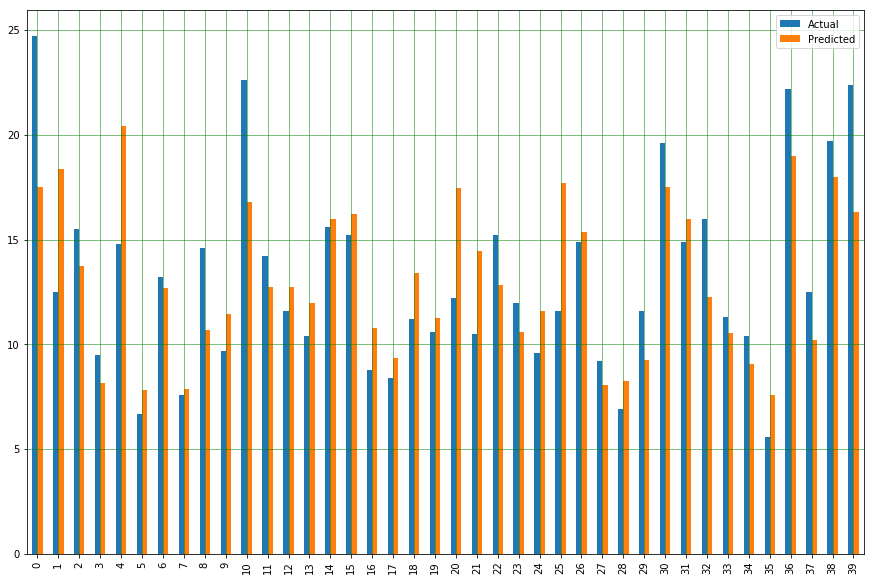

In [22]:
df.plot(kind='bar',figsize=(15,10))
pt.grid(which='major', linestyle='-', linewidth=0.5, color='green')
pt.grid(which='minor', linestyle=':', linewidth=0.5, color='blue')
pt.show()

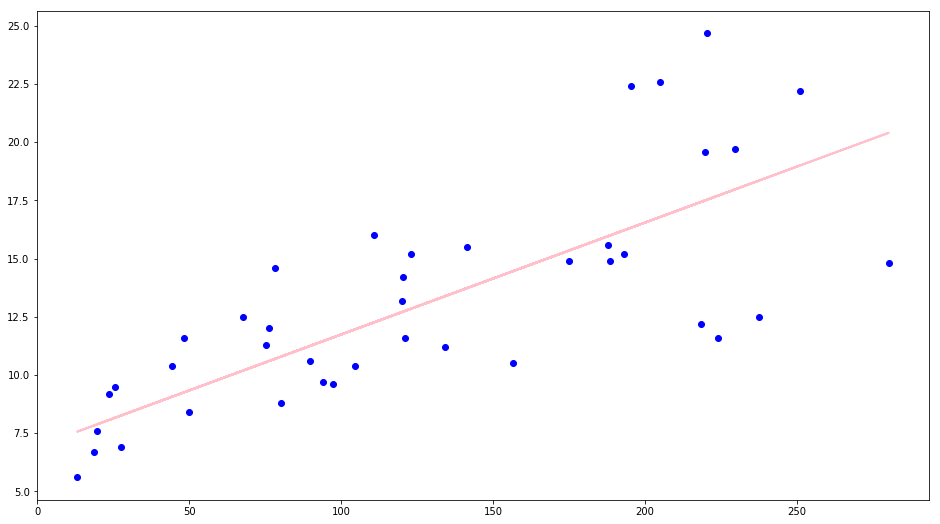

In [23]:
pt.figure(figsize=(16,9))
pt.scatter(x_test, y_test, color='blue')
pt.plot(x_test, y_predict, color='pink', linewidth=2)
pt.show()

In [24]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squered Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 2.4267814089000392
Mean Squered Error: 9.3725073383835
Root Mean Squared Error: 3.0614551014809117


In [26]:
# to see how the line fits the data

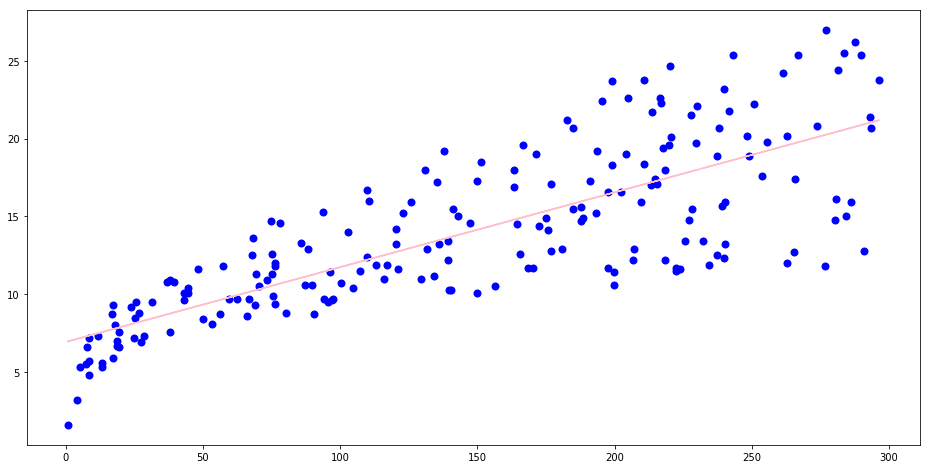

In [57]:
pred = regressor.predict(x)
pt.figure(figsize=(16, 8))
pt.scatter(dataset['TV'],
           dataset['sales'],
           color='blue',
           linewidth=2)
pt.plot(dataset['TV'],pred, color='pink')
pt.xlabel="Money spent on TV ads ($)"
pt.ylabel="Sales"

In [60]:
# Assesing the relevancy of the model
# Using th R2 value and the p-value from each coefficient

In [64]:
x = dataset['TV']
y = dataset['sales']
x2  = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.47e-42
Time:                        11:10:03   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [65]:
# Then, looking at the R² value, we have 0.612. Therefore, about 60% of the variability
# of sales is explained by the amount spent on TV ads.

# Multiple Linear regression

In [79]:
xs = dataset.drop(['sales', 'Unnamed: 0'], axis=1)
y = dataset['sales'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(xs, y)
a = reg.intercept_[0]
b, c, d = reg.coef_[0][0],reg.coef_[0][1], reg.coef_[0][2]
print(f'The linear model is: Y = {a:.5} + {b:.5}*TV + {c:.5}*radio + {d:.5}*newspaper')

The linear model is: Y = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


In [80]:
# Assesing the relevance of the model

In [82]:
x = np.column_stack((dataset['TV'], dataset['radio'], dataset['newspaper']))
y = dataset['sales']

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.58e-96
Time:                        11:30:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0